# LSTM model for crypto prediction

We will build a LSTM model to predict crypto price.

**Content**

* load data
* feature engineering
* train model
* predict future values
* check results

Reference for how to build a LSTM model for stock market prediction:
* https://www.datacamp.com/community/tutorials/lstm-python-stock-market
* https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

Reference for how to build a multivariate time series forecasting with LSTM:
* https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
* https://www.analyticsvidhya.com/blog/2020/10/multivariate-multi-step-time-series-forecasting-using-stacked-lstm-sequence-to-sequence-autoencoder-in-tensorflow-2-0-keras/

In [23]:
# load required packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request
import json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [39]:
print(f'pandas: {pd.__version__}')
print(f'json: {json.__version__}')
print(f'numpy: {np.__version__}')
print(f'tensorflow: {tf.__version__}')

pandas: 1.2.1
json: 2.0.9
numpy: 1.19.5
tensorflow: 2.4.1


## Load data

With this exercise, we will work with **hourly** ticker data for **ETHEUR**. The data was extracted from the Binance API (see the notebook "hist_data_from_binance.ipynb". For reasons of convenience, we will simply load the csv file generated through the other notebook.

The data spans over more than 10,000 data points for a total time of a little more than a year: from 2020-01-03 to 2021-02-28. We have open, high, low, close, volume available for every hour of the days included in the dataset.

In [18]:
filepath = 'binance/data/etheur_2020-01_2021-02_1h.csv'
data = pd.read_csv(filepath, index_col=0)
print(f"Loaded {data.shape[0]} rows and {data.shape[1]} cols.")
print("Here is a preview of the first three lines:\n", data.head(3))

Loaded 10125 rows and 6 cols.
Here is a preview of the first three lines:
                           datetime    open    high     low   close   volume
2020-01-03 09:00:00  1578038400000  113.80  115.40  113.80  115.40  1.10270
2020-01-03 10:00:00  1578042000000  118.46  118.46  118.46  118.46  0.50000
2020-01-03 11:00:00  1578045600000  118.06  118.06  118.02  118.02  1.33288


<AxesSubplot:>

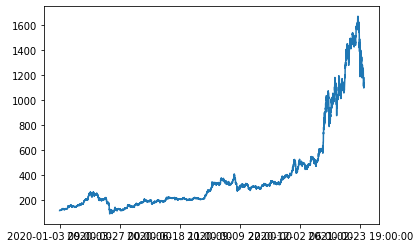

In [49]:
# visualize the data to validate the load
data['close'].plot()

## Feature engineering

Prepare the features for that will serve the LSTM model as input.

### prepare more features

* mid-price

### train test split